**Credit card fraud is a major concern, and this notebook explores fraud detection using machine learning. It covers data preprocessing, visualization, feature engineering, and model building to detect fraudulent transactions.**

1. pandas – For handling structured data (tables, CSV files, etc.).
2. numpy – For numerical computations and array manipulations.
3. matplotlib.pyplot – For creating static visualizations.
4. seaborn – Enhances visualizations, making them more informative.
5. statistics – Provides basic statistical functions.

Processing Libraries:
1. sklearn.metrics – Provides evaluation metrics like accuracy, precision-recall, and ROC curves.
2. sklearn.preprocessing – Includes StandardScaler for feature scaling.
3. sklearn.model_selection – Contains train_test_split and GridSearchCV for model tuning.
4. mpl_toolkits.mplot3d – Used for 3D plotting.
5. collections – Provides specialized data structures like Counter.
6. scipy.stats – Contains statistical functions such as uniform.

Machine Learning Models:
1. sklearn.manifold.TSNE – A dimensionality reduction technique for visualizing high-dimensional data.
2. sklearn.ensemble.RandomForestClassifier – A powerful tree-based model for classification.
3. sklearn.tree.DecisionTreeClassifier – A simple tree-based classifier.
4. sklearn.linear_model.Lasso – A regression model with L1 regularization.
5. sklearn.linear_model.LogisticRegression – A fundamental classification model.
6. xgboost – An optimized gradient boosting algorithm for structured data.
7. AdaBoostClassifier – Adaptive boosting for improving weak classifiers.
8. lightgbm – A fast, efficient boosting algorithm for large datasets.

In [54]:
# importing all the necessary libraries that I have used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# Import processing libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve,average_precision_score, recall_score, precision_score, roc_curve, auc, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from scipy.stats import uniform


## Models
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

This dataset contains transactions made by credit cards in September 2013 by European cardholders. It is highly imbalanced, with fraudulent transactions being significantly fewer than legitimate ones.

Key Features:
1. Time: The seconds elapsed between the first transaction and the current transaction.
2. V1 to V28: These are anonymized features obtained using Principal Component Analysis (PCA) for privacy protection.
3. Amount: The transaction amount, which can be useful for fraud detection.
4. Class: The target variable where:
**0 = Legitimate transaction** **1 = Fraudulent transaction**

In [86]:
Credit_Card_DataFrame = pd.read_csv("A:/Github/Projects/Credit Card Project/DataSet/creditcard.csv")
Credit_Card_DataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Model Training Based on all the observation from the data

**1. Decision Tree Classifier**

In [ ]:
# Prepping the Data

X = Credit_Card_DataFrame.drop(columns=["Class","Amount Range","Time Range"])
scaler = StandardScaler()
X[["Time","Amount"]] = scaler.fit_transform(X[["Time","Amount"]])
y = Credit_Card_DataFrame["Class"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1111, stratify=y)

In [77]:
decision_tree = DecisionTreeClassifier()

parameters = {
    'max_depth':[5,10,15],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf':[2,4,6,8],
    'criterion':['gini','entropy']
}

grid_search_cv = GridSearchCV(decision_tree, param_grid=parameters, cv=5, scoring="f1", n_jobs=-1)

In [78]:
# Model lifting
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='f1')

In [79]:
best_fit_model = grid_search_cv.best_params_
print(best_fit_model)
best_dt_model = grid_search_cv.best_estimator_
y_pred = best_dt_model.predict(x_test)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 4}



Decision Tree Performance After Tuning:

Accuracy: 0.9995611109160493

Confusion Matrix:
 [[56861     3]
 [   22    76]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



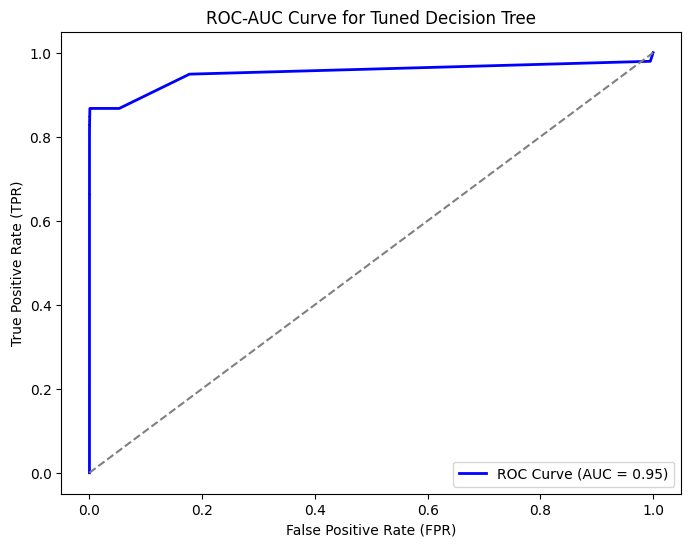

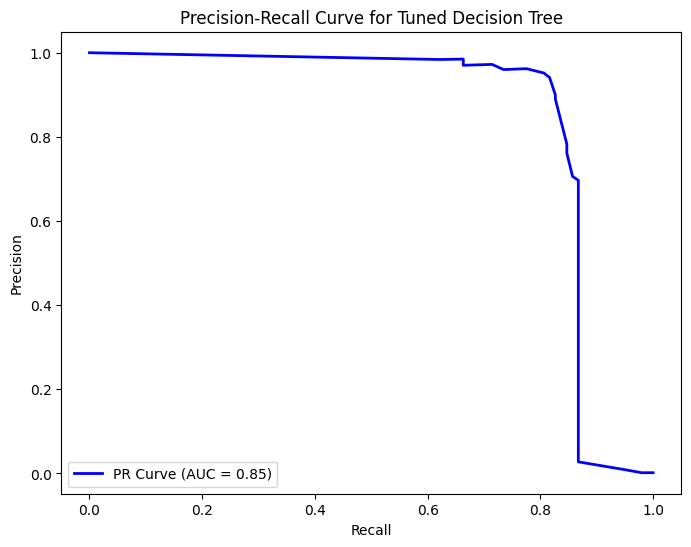

In [81]:
print("\nDecision Tree Performance After Tuning:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
y_prob = best_dt_model.predict_proba(x_test)[:, 1]

# Computing ROC AUC value

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for Tuned Decision Tree")
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute AUC-PRC
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Tuned Decision Tree")
plt.legend(loc="lower left")
plt.show()


**Relative to the dataset size, the model achieves high precision and recall, indicating strong performance in detecting fraud, especially given the dataset’s class imbalance. Overall, the model achieved quite a good result for both precision and recall**

**2. Logistic Regression**

In [ ]:
# Prepping the Data

X = Credit_Card_DataFrame.drop(columns=["Amount Range", "Time Range"])
grouped_df = X.groupby(["Amount", "Class"]).mean().reset_index()
# Split into Class 0 and Class 1 DataFrames
grouped_class_0 = grouped_df[grouped_df["Class"] == 0].drop(columns=["Class"])
grouped_class_1 = grouped_df[grouped_df["Class"] == 1].drop(columns=["Class"])
x_grouped = grouped_df.drop(columns=["Class"])
y_grouped = grouped_df["Class"]
print(x_grouped.shape)
print(y_grouped.shape)

(32960, 30)
(32960,)


In [69]:
Scaler = StandardScaler()
x_grouped[["Amount","Time"]] = Scaler.fit_transform(grouped_df[["Amount","Time"]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x_grouped, y_grouped, test_size=0.2, random_state=1111)

In [73]:
param_grid = {
    "C": [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
}

model = LogisticRegression(max_iter=1500, solver='saga', penalty='l1', random_state=42)


grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)


c:\Users\reshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 0.1}


c:\Users\reshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1500, penalty='l1', random_state=42,
                   solver='saga')


Logistic Regression Performance After Tuning:

Accuracy: 0.9975728155339806

Confusion Matrix:
 [[6526    2]
 [  14   50]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6528
           1       0.96      0.78      0.86        64

    accuracy                           1.00      6592
   macro avg       0.98      0.89      0.93      6592
weighted avg       1.00      1.00      1.00      6592



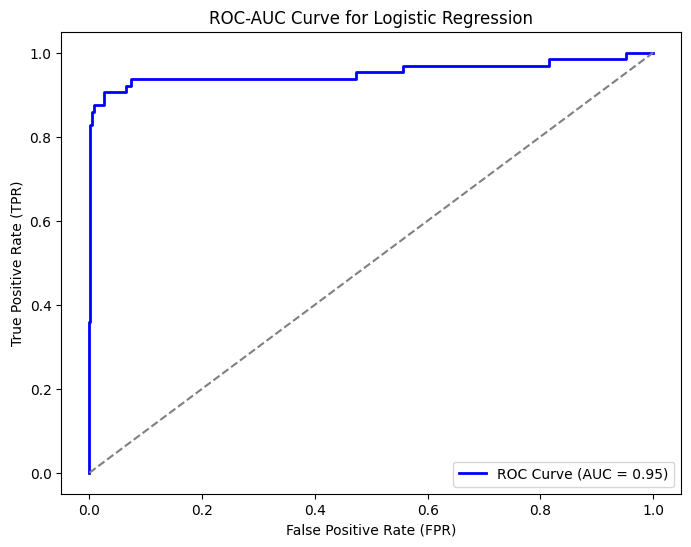

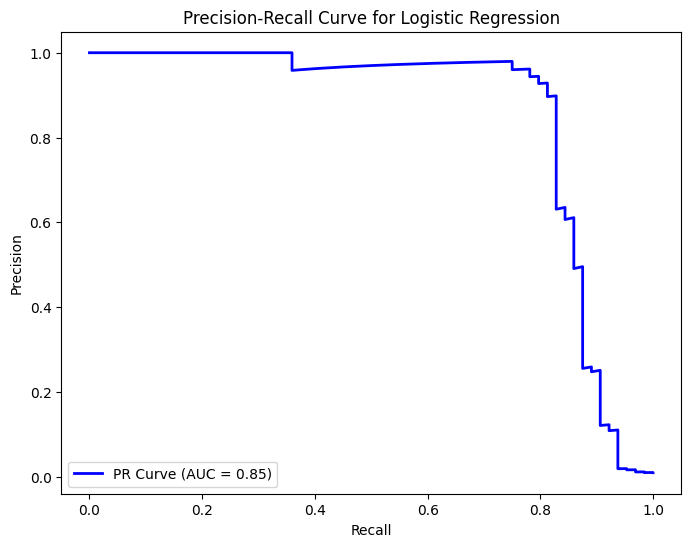

In [74]:
print("\nLogistic Regression Performance After Tuning:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict on test data
y_pred = best_model.predict(X_test)

y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression")
plt.legend(loc="lower left")
plt.show()

**Relative to the dataset size, the Logistic Regression model performs exceptionally well, achieving high precision (0.96) and strong recall (0.78). The overall accuracy (99.75%) indicates the model effectively distinguishes between fraud and non-fraud cases. With a balanced F1-score of 0.86, the model demonstrates robustness in fraud detection, making it a reliable choice for deployment.**

**3. Random Forest Classifier**

In [96]:
# Prepping up Data

X = Credit_Card_DataFrame.drop(columns=["Class","Amount Range","Time Range"])
scaler = StandardScaler()
X[["Time","Amount"]] = scaler.fit_transform(X[["Time","Amount"]])
X["Amount"] = np.log1p(X["Amount"])
y = Credit_Card_DataFrame["Class"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1111, stratify=y)


In [77]:
#RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)  # class_weight="balanced" will give more weight to fraud classes as they are less in number
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)


Random Forest Performance After Tuning:

Accuracy: 0.9996488887328394

Confusion Matrix:
 [[56863     1]
 [   19    79]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.81      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



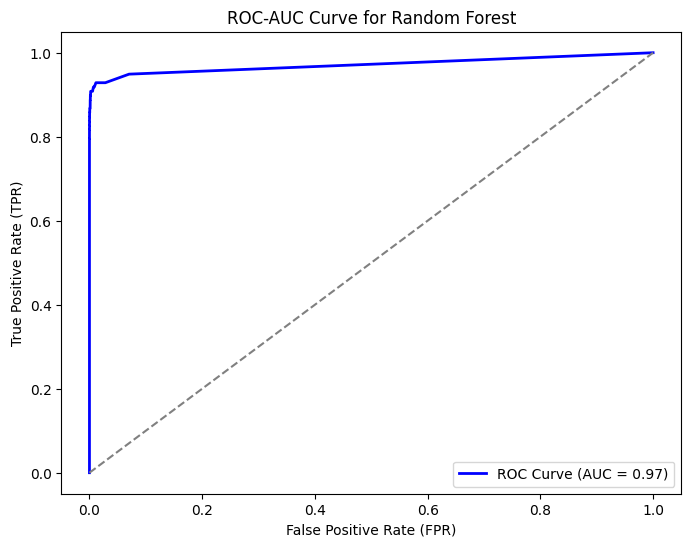

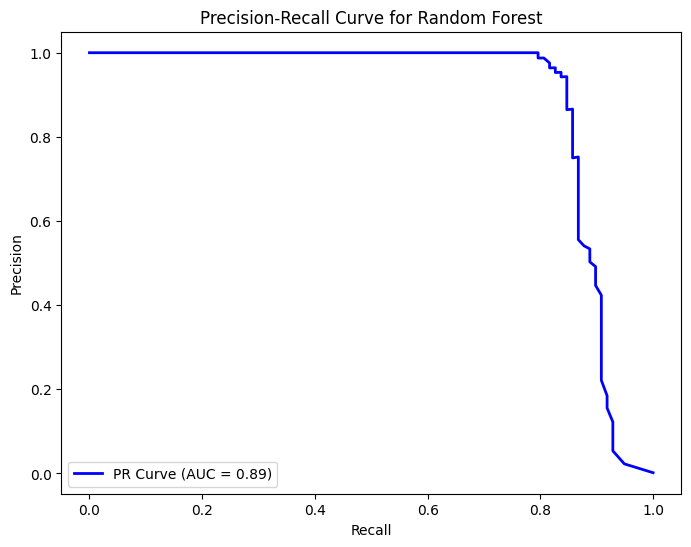

In [98]:

# Make predictions
y_pred = rf.predict(x_test)
y_probability = rf.predict_proba(x_test)[:,1]


print("\nRandom Forest Performance After Tuning:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


fpr, tpr, _ = roc_curve(y_test,y_probability)
roc_auc = auc(fpr,tpr)

precision, recall, _ = precision_recall_curve(y_test, y_probability)
pr_auc = auc(recall, precision)

# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest")
plt.legend(loc="lower left")
plt.show()

**Relative to the dataset size, the Random Forest model delivers exceptional precision (0.99) and strong recall (0.81), ensuring high fraud detection accuracy. The F1-score of 0.89 indicates a great balance between precision and recall, minimizing both false positives and false negatives. With an overall accuracy of 99.96%, this model proves to be highly reliable for fraud detection**